<a href="https://colab.research.google.com/github/josefinavanotti/josefinavanotti/blob/main/TP_Python_Estad%C3%ADsitica_Actuarial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2.1 Estadística Descriptiva y Manejo de Datos**

Importo las librerías que se van a utilizar:

In [133]:
import pandas as pd
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sn

from scipy import stats
from random import sample
from scipy.stats import norm
import warnings

import itertools 

warnings.filterwarnings("ignore")
plt.style.use('tableau-colorblind10')

import statsmodels.api as sm
import matplotlib

warnings.simplefilter("ignore")

Importación y lectura del archivo:

In [134]:
from google.colab import files
uploaded = files.upload()

Saving WorldCupMatches.csv to WorldCupMatches (1).csv


In [135]:
df = pd.read_csv('WorldCupMatches.csv') 

In [136]:
df = df.drop_duplicates()
df = df[df['Year'].notna()]
df.shape#836 filas
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
round(df.describe()) #Estadísticas

## ▶*Problem 1*
Obtenga la cantidad total de goles en los mundiales del año:

In [137]:
total_goals= df['Home Team Goals'] + df['Away Team Goals']
df = df.assign(total_goals=total_goals)
print(df. iloc[:,-1:])

     total_goals
0            5.0
1            3.0
2            3.0
3            4.0
4            1.0
..           ...
831          1.0
832          3.0
833          2.0
834          1.0
835          3.0

[836 rows x 1 columns]


In [ ]:
goals_78=sum(df[df['Year'] == 1978]['total_goals'])
goals_78
print("la cantidad total de goles en el mundial del año 1978 fue:", goals_78 )

la cantidad total de goles en el mundial del año 1978 fue: 102.0


In [ ]:
goals_86=sum(df[df['Year'] == 1986]['total_goals'])
goals_86
print("la cantidad total de goles en el mundial del año 1986 fue:", goals_86 )

la cantidad total de goles en el mundial del año 1986 fue: 132.0


In [ ]:
goals_90=sum(df[df['Year'] == 1990]['total_goals'])
goals_90
print("la cantidad total de goles en el mundial del año 1990 fue:", goals_90 )

la cantidad total de goles en el mundial del año 1990 fue: 115.0


# ▶*Problem 2:*
 Obtenga la cantidad de goles anotados por Argentina entre 1998 y 2010, inclusive.
¿Cuántos fueron de ’local’ (home) y cuántos de ’visitante’ (away)?


In [ ]:

year_range_query = (df['Year'] >= 1998) & (df['Year'] <= 2010)
wcp = df[year_range_query]
arg_local_goals = sum(wcp[wcp['Home Team Name'] == 'Argentina']['Home Team Goals'])
arg_away_goals = sum(wcp[wcp['Away Team Name'] == 'Argentina']['Away Team Goals'])
total_arg_goals = arg_local_goals + arg_away_goals

print('La cantidad de goles anotados por Argentina entre 1998 y 2010 fue de:',total_arg_goals, '. Los goles de local fueron',arg_local_goals , 'y los goles de visitante fueron' , arg_away_goals )


La cantidad de goles anotados por Argentina entre 1998 y 2010 fue de: 33.0 . Los goles de local fueron 28.0 y los goles de visitante fueron 5.0


# ▶ Problem 3
¿Cuál de los siguientes países jugó más mundiales: Brasil, Inglaterra o Francia? Indique
el total de veces que jugó cada uno.


In [ ]:
#Recuento de mundiales que jugó Brasil
bra_matches_home = (df['Home Team Name'] == 'Brazil')
bra_matches_away = (df['Away Team Name'] == 'Brazil')
bmh = df[bra_matches_home]
bma = df[bra_matches_away]
bra_cups_home = bmh[['Year','Home Team Name']]
bra_cups_home = bra_cups_home.drop_duplicates()
bra_cups_away = bma[['Year', 'Away Team Name']]
bra_cups_away = bra_cups_home.drop_duplicates()
bra_cups = pd.merge(bra_cups_home,bra_cups_away,how='outer')
total_bra_cups = bra_cups.count()['Year']

In [ ]:
#Recuento de mundiales que jugó Inglaterra
eng_matches_home = (df['Home Team Name'] == 'England')
eng_matches_away = (df['Away Team Name'] == 'England')
emh = df[eng_matches_home]
ema = df[eng_matches_away]
eng_cups_home = emh[['Year','Home Team Name']]
eng_cups_home = eng_cups_home.drop_duplicates()
eng_cups_away = ema[['Year', 'Away Team Name']]
eng_cups_away = eng_cups_home.drop_duplicates()
eng_cups = pd.merge(eng_cups_home,eng_cups_away,how='outer')
total_eng_cups = eng_cups.count()['Year']

In [ ]:
#Recuento de mundiales que jugó Francia
fra_matches_home = (df['Home Team Name'] == 'France')
fra_matches_away = (df['Away Team Name'] == 'France')
fmh = df[fra_matches_home]
fma = df[fra_matches_away]
fra_cups_home = fmh[['Year','Home Team Name']]
fra_cups_home = fra_cups_home.drop_duplicates()
fra_cups_away = fma[['Year', 'Away Team Name']]
fra_cups_away = fra_cups_home.drop_duplicates()
fra_cups = pd.merge(fra_cups_home,fra_cups_away,how='outer')
total_fra_cups = fra_cups.count()['Year']

In [ ]:
if total_fra_cups > total_eng_cups :
  print('El país que jugó más mundiales fue Francia con',total_fra_cups,'- Brasil jugó',total_bra_cups,'- Inglaterra jugó',total_eng_cups)
elif total_eng_cups > total_bra_cups :
    print('El país que jugó más mundiales fue Inglaterra con',total_eng_cups,'- Brasil jugó',total_bra_cups,'- Francia jugó',total_fra_cups)
else :
      print('El país que jugó más mundiales fue Brasil con',total_bra_cups,'- Francia jugó',total_fra_cups,'- Inglaterra jugó',total_eng_cups)

El país que jugó más mundiales fue Brasil con 19 - Francia jugó 13 - Inglaterra jugó 14


# ▶ Problem 4
Calcule el promedio, la mediana y el desvío de los goles anotados por equipos ’locales’ (home) entre los años 2006 y 2014, inclusive. Grafique un histograma con la distribución de dicha variable.

In [ ]:
year_range = (df['Year'] >= 2006) & (df['Year'] <= 2014) #192 partidos
htg = df[year_range]
home_team_goals = htg[['Year','Home Team Goals']]
mean_htg = round(np.mean(htg['Home Team Goals']),4)
print('El promedio de goles anotados por equipos "locales" fue de:',mean_htg)


#otra forma
#total_years = year_range.sum()
#home_team_goals = sum(htg['Home Team Goals'])  #243 goles de local
#mean_home_team_goals = home_team_goals/total_years
#print('El promedio de goles anotados por equipos "locales" fue de:',mean_home_team_goals)
#mean_home_team_goals = htg.mean(htg['Home Team Goals'])


El promedio de goles anotados por equipos "locales" fue de: 1.2656


In [ ]:
median_htg = np.median(htg['Home Team Goals'])
print('La mediana de goles anotados por equipos "locales" fue de:',median_htg)

La mediana de goles anotados por equipos "locales" fue de: 1.0


In [ ]:
std_htg = round(np.std(htg['Home Team Goals']),4)
print('El desvío de goles anotados por equipos "locales" fue de:',std_htg)

El desvío de goles anotados por equipos "locales" fue de: 1.2107


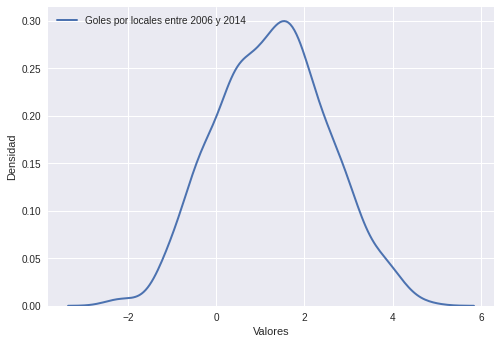

In [ ]:
params = [(mean_htg, std_htg)]


for mu, sigma in params:
    sn.distplot(np.random.normal(mu, sigma, 1000), hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.legend(prop={'size': 8}, title = 'Parámetros')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend(['Goles por locales entre 2006 y 2014'])
plt.show()

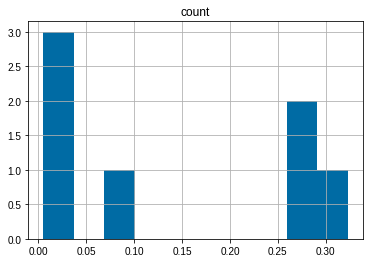

In [ ]:
#Para una funcion de distribucion binomial B(n,p) con n cantidad de goles y probabilidad de cada gol
n = home_team_goals['Home Team Goals'].max()
Freq = pd.crosstab(index=home_team_goals['Home Team Goals'], columns='count')
Freq2 = Freq/Freq.sum()
#Freq2 = Freq2.rename(columns={'count':'fi'})
Freq3 = Freq2.cumsum()
Freq3 = Freq3.rename(columns={'count':'Fi'})

#Freq2 = Freq2.reset_index()
Freq2.hist()
#Freq3
#Frequency = pd.concat([Freq2,Freq3],axis=1)
#Frequency.rename(columns={'col_0':'Year'})
plt.style.use('seaborn')

In [ ]:
#plt.hist(home_team_goals['Home Team Goals'])
ax = Freq2.hist(Freq2['Home Team Goals'], bins=7, grid=False, figsize=(10,8), color='#86bf91', rwidth=0.9)
#histogram
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Home Team Goals", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Quantity", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

KeyError: ignored

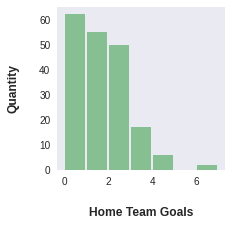

In [ ]:
#plt.hist(home_team_goals['Home Team Goals'])
ax = home_team_goals.hist(column='Home Team Goals', bins=7, grid=False, figsize=(3,3), color='#86bf91', rwidth=0.9)
#histogram
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Home Team Goals", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Quantity", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#*Problem 5*

Obtenga la media y la varianza de la asistencia de cada partido (attendance) entre los
años 1930 y 1960. Realice lo mismo para el período 1980 a 2010. Compare ambas
distribuciones mediante un gráfico donde se vean dichas distribuciones sobre el mismo
eje.


In [ ]:
year_range_query2 = (df['Year'] >= 1930) & (df['Year'] <= 1960)
atte=df[year_range_query2]
attendance = sum(atte['Attendance'])
attendance_mean1 = attendance/len(atte['Attendance'])
print('La media de la asistencia de cada partido entre 1930 y 1960 es:' , attendance_mean1)

La media de la asistencia de cada partido entre 1930 y 1960 es: 29139.058823529413


In [ ]:
attendance_var1 = statistics.variance(atte['Attendance'])
print('La varianza de la asistencia de cada partido entre 1930 y 1960 es:' , attendance_var1)

La varianza de la asistencia de cada partido entre 1930 y 1960 es: 773630510.0261438


In [ ]:
year_range_query2 = (df['Year'] >= 1980) & (df['Year'] <= 2010)
atte=df[year_range_query2]
attendance = sum(atte['Attendance'])
attendance_mean2 = attendance/len(atte['Attendance'])
print('La media de la asistencia de cada partido entre 1980 y 2010 es:' , attendance_mean2)

La media de la asistencia de cada partido entre 1980 y 2010 es: 48784.69612068965


In [ ]:
attendance_var2 = statistics.variance(atte['Attendance'])
print('La varianza de la asistencia de cada partido entre 1980 y 2010 es:' , attendance_var2)

La varianza de la asistencia de cada partido entre 1980 y 2010 es: 390216083.0284082


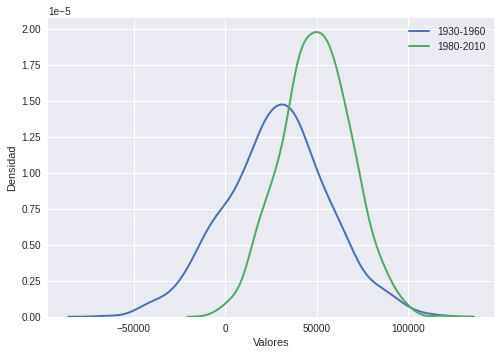

In [ ]:
params = [(attendance_mean1, np.sqrt(attendance_var1)),(attendance_mean2, np.sqrt(attendance_var2))]


for mu, sigma in params:
    sn.distplot(np.random.normal(mu, sigma, 1000), hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.legend(prop={'size': 8}, title = 'Parámetros')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend(['1930-1960', '1980-2010'])
plt.show()

# ▶ Problem 6
Obtenga cual es el país que:
1. más partidos ganó entre 1970 y 1990
2. menos partidos ganó entre 2002 y 2010
3. anotó la mayor cantidad de goles en el mismo partido entre 1930 y 1950
4. más empates ha tenido

In [ ]:
#más partidos ganó entre 1970 y 1990
year_range_query3 = (df['Year'] >= 1970) & (df['Year'] <= 1990)
m_w = df[year_range_query3]
most_winner = m_w[['Year','Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]

home_wins = most_winner.loc[most_winner['Home Team Goals']>most_winner['Away Team Goals']]
away_wins = most_winner.loc[most_winner['Away Team Goals']>most_winner['Home Team Goals']]

home_wins2 = pd.DataFrame(home_wins['Home Team Name'].value_counts())
away_wins2 = pd.DataFrame(away_wins['Away Team Name'].value_counts())

win_matches= pd.concat([home_wins2,away_wins2],axis=1)
win_matches = win_matches.fillna(0)
win_matches = win_matches['Home Team Name'] + win_matches['Away Team Name']
win_matches = pd.DataFrame(win_matches).sort_values(0,ascending=False).reset_index()
print('El país que más partidos ganó entre 1970 y 1990 fue:', win_matches.iat[0,0],'con',win_matches.iat[0,1],'partidos.')


El país que más partidos ganó entre 1970 y 1990 fue: Brazil con 24.0 partidos.


In [ ]:
#menos partidos ganó entre 2002 y 2010
year_range_query4 = (df['Year'] >= 2002) & (df['Year'] <= 2010)
l_w = df[year_range_query4]
less_winner = l_w[['Year','Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]

home_lose = less_winner.loc[less_winner['Home Team Goals'] < less_winner['Away Team Goals']]
away_lose = less_winner.loc[less_winner['Away Team Goals'] < less_winner['Home Team Goals']]

home_lose2 = pd.DataFrame(home_lose['Home Team Name'].value_counts())
away_lose2 = pd.DataFrame(away_lose['Away Team Name'].value_counts())

lost_matches= pd.concat([home_lose2,away_lose2],axis=1)
lost_matches = lost_matches.fillna(0)
lost_matches = lost_matches['Home Team Name'] + lost_matches['Away Team Name']
lost_matches = pd.DataFrame(lost_matches).sort_values(0,ascending=False)
print('El país que más partidos perdió entre 2002 y 2010 fue:', lost_matches.head(6))

El país que más partidos perdió entre 2002 y 2010 fue:                   0
Korea Republic  5.0
Portugal        5.0
Paraguay        5.0
Saudi Arabia    5.0
Mexico          5.0
USA             5.0


In [ ]:
#anotó la mayor cantidad de goles en el mismo partido entre 1930 y 1950
year_range_query5 = (df['Year'] >= 1930) & (df['Year'] <= 1950)
t_s = df[year_range_query5]
top_scorer = t_s[['Year','Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]
home_top_scorer = top_scorer.sort_values('Home Team Goals',ascending=False)
away_top_scorer = top_scorer.sort_values('Away Team Goals',ascending=False)
if home_top_scorer.iat[0,2] > away_top_scorer.iat[0,2]:
  print('El país que anotó la mayor cantidad de goles en el mismo partido entre 1930 y 1950 fue:',home_top_scorer.iat[0,1],'con',home_top_scorer.iat[0,2],'goles.')
else:
  print('El país que anotó la mayor cantidad de goles en el mismo partido entre 1930 y 1950 fue:',away_top_scorer.iat[0,4],'con',away_top_scorer.iat[0,3],'goles.')


El país que anotó la mayor cantidad de goles en el mismo partido entre 1930 y 1950 fue: Sweden con 8.0 goles.


In [ ]:
#más empates ha tenido
ties = df[['Year','Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]
top_ties = ties.loc[ties['Home Team Goals'] == ties['Away Team Goals']]
top_ties = top_ties.sort_values('Home Team Name')
top_ties = top_ties['Home Team Name'].value_counts()
top_ties = pd.DataFrame(top_ties).reset_index()
print('El país que más empates tuvo a lo largo de todos los mundiales fue:',top_ties.iat[0,0],'con',top_ties.iat[0,1],'partidos empatados.')

El país que más empates tuvo a lo largo de todos los mundiales fue: Italy con 14 partidos empatados.


# ▶ Problem 7
Obtenga el promedio de goles a favor por partido para Argentina y Alemania en el mundial del año 2014


In [ ]:
year_range_query6 = (df['Year'] == 2014) & (df['Home Team Name'] == 'Argentina')
year_range_query7 = (df['Year'] == 2014) & (df['Away Team Name'] == 'Argentina')
arg = df[year_range_query6]
arg2 = df[year_range_query7]
arg = arg[['Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]
arg2 = arg2[['Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]
arg_home = arg['Home Team Goals'].sum()
arg_home2 = arg['Home Team Name'].value_counts()
arg_away = arg2['Away Team Goals'].sum()
arg_away2 = arg2['Away Team Name'].value_counts()
arg_goals = arg_away + arg_home
arg_goals_mean = pd.DataFrame(arg_goals/(arg_home2+arg_away2)).reset_index()
print('Promedio de goles a favor de Argentina en 2014:',arg_goals_mean.iat[0,1])

Promedio de goles a favor de Argentina en 2014: 1.1428571428571428


In [ ]:
year_range_query8 = (df['Year'] == 2014) & (df['Home Team Name'] == 'Germany')
year_range_query9 = (df['Year'] == 2014) & (df['Away Team Name'] == 'Germany')
ger = df[year_range_query8]
ger2 = df[year_range_query9]
ger = ger[['Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]
ger2 = ger2[['Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]
ger_home = ger['Home Team Goals'].sum()
ger_home2 = ger['Home Team Name'].value_counts()
ger_away = ger2['Away Team Goals'].sum()
ger_away2 = ger2['Away Team Name'].value_counts()
ger_goals = ger_away + ger_home
ger_goals_mean = pd.DataFrame(ger_goals/(ger_home2 + ger_away2)).reset_index()
print('Promedio de goles a favor de Alemania en 2014:',ger_goals_mean.iat[0,1])

Promedio de goles a favor de Alemania en 2014: 2.5714285714285716


# ▶ Problem 8

Grafique a través de un gráfico de barras los 10 países con más participaciones en
mundiales.

In [ ]:
def participaciones(df, country): 
  #Esta función también se podría haber utilizado en el problema 3
  matches = (df['Home Team Name'] == country) | (df['Away Team Name'] == country) 
  years = set(df[matches]['Year'])
  wcp = len(years)
  return wcp

x = [(participaciones(df, country), country) for country in (set(df['Home Team Name']) | set(df['Away Team Name']))]
x.sort(reverse = True)
x = x[:10]
x


[(20, 'Brazil'), (18, 'Italy'), (16, 'Argentina'), (15, 'Mexico'), (14, 'Spain'), (14, 'France'), (14, 'England'), (12, 'Uruguay'), (12, 'Belgium'), (11, 'Sweden')]


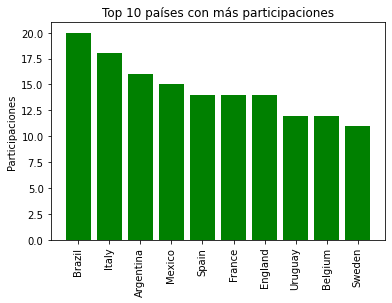

In [ ]:
print(x)
ps = [participaciones for (participaciones, country) in x]
cs = [country for (participaciones, country) in x]


fig, ax = plt.subplots()
ax.bar(x=np.arange(len(ps)),
       height=ps,
       color="green", 
       align="center",
       tick_label=cs)
ax.set_ylabel('Participaciones')
ax.set_title('Top 10 países con más participaciones')
plt.xticks(rotation=90)
plt.show()


# ▶ Problem 9



Determine si existe alguna ciudad que haya tenido más de 6 apariciones en mundiales
y que en cada una de dichas ocasiones haya tenido más de 35.000 espectadores.


In [ ]:
cities = df[['City', 'Attendance']]
city_matches = pd.DataFrame(cities['City'].value_counts())
city_matches6 = city_matches.loc[city_matches['City'] > 6].reset_index().rename(columns = {'index':'Cities','City':'Quantity'})
attend = cities[cities.City.isin(city_matches6.Cities)]
top_attend = attend.loc[attend['Attendance'] > 35000]
top_attend = pd.DataFrame(top_attend['City'].value_counts()).reset_index().rename(columns = {'index':'Cities','City':'Quantity'})

print('Las siguientes ciudades tuvieron más de 6 apariciones en mundiales y en cada una de esas ocasiones, tuvo más de 35.000 espectadores')
pd.merge(city_matches6,top_attend)

Las siguientes ciudades tuvieron más de 6 apariciones en mundiales y en cada una de esas ocasiones, tuvo más de 35.000 espectadores


,Cities,Quantity
0,Johannesburg,15
1,Buenos Aires,12
2,Frankfurt/Main,10
3,London,10
4,Santiago De Chile,10
5,Saint-Denis,9
6,Barcelona,8
7,Los Angeles,8
8,Cape Town,8
9,New York/New Jersey,7


# ▶ Problem 10
¿Cuál es la ciudad con el mayor número de partidos que han terminado con una diferencia de 3 goles?

In [ ]:
cities_goals = df[['City','Home Team Goals', 'Away Team Goals']]
cities_goals['Difference'] = pd.DataFrame(abs(cities_goals['Home Team Goals'] - cities_goals['Away Team Goals']))
cities_goals_dif = cities_goals[['City','Difference']]
cities_goals_dif3 = pd.DataFrame(cities_goals_dif.loc[cities_goals_dif['Difference'] == 3].value_counts()).reset_index().rename(columns = {'index':'City','Difference':'Difference'})
cities_goals_dif3.iat[0,2]
print('La ciudad con más partidos terminados con diferencia de 3 goles fue:',cities_goals_dif3.iat[0,0],'con',cities_goals_dif3.iat[0,2])

La ciudad con más partidos terminados con diferencia de 3 goles fue: Montevideo  con 5


# **2.2 Series Temporales**






In [138]:
df['total_goals'] = df['total_goals'].astype(int)
goles_por_mundial = df.groupby('Year')['total_goals'].sum()
goles_por_mundial

Year
1930.0     70
1934.0     70
1938.0     84
1950.0     88
1954.0    140
1958.0    126
1962.0     89
1966.0     89
1970.0     95
1974.0     97
1978.0    102
1982.0    146
1986.0    132
1990.0    115
1994.0    141
1998.0    171
2002.0    161
2006.0    147
2010.0    145
2014.0    171
Name: total_goals, dtype: int64

In [139]:
# Armo una función para poder visualizar los valores entre ciertas fechas
def fechas_por_periodos(df, fecha_minima, fecha_maxima = False):
    if fecha_maxima == False:
        print(df[fecha_minima:])
        
    else:
        print(df[fecha_minima:fecha_maxima])
        
fechas_por_periodos(goles_por_mundial,"2006","2014")       


Year
2006.0    147
2010.0    145
Name: total_goals, dtype: int64


**Visualización de la Serie**

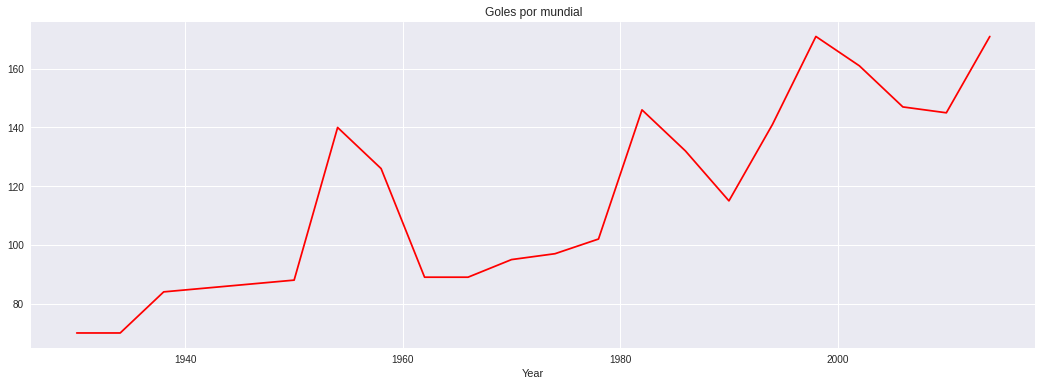

In [ ]:
goles_por_mundial.plot(figsize=(18, 6), color = "red")
plt.title("Goles por mundial")
plt.show()

In [140]:
from pylab import rcParams

#▶ Punto 1
Realizar un Análisis Descriptivo de las Series de Tiempo (Percentiles, Promedio, Varianza, Kurtosis, Asimetría, Gráfico de Box-Plot, etc.)


In [ ]:
print('El promedio es:', goles_por_mundial.mean())
print('La varianza es:', goles_por_mundial.var())
print('La kurtosis es:', goles_por_mundial.kurtosis())
print('La asimetría es:', goles_por_mundial.skew())
print('Los percentiles son:', goles_por_mundial.quantile([0.25,0.50,0.75]))

El promedio es: 118.95
La varianza es: 1087.2078947368423
La kurtosis es: -1.3371945092403794
La asimetría es: 0.07936221425714736
Los percentiles son: 0.25     89.00
0.50    120.50
0.75    145.25
Name: total_goals, dtype: float64


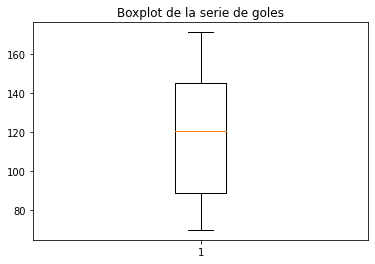

In [ ]:
plt.boxplot(goles_por_mundial)
plt.title("Boxplot de la serie de goles")
plt.show()

#▶ Punto 2
Si la serie no fuese estacionaria deberá realizar las pruebas correspondientes para
testear la presencia de raíces unitarias.

In [ ]:
#esto no va a ir creo
X = goles_por_mundial.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print("Media 1: {} | Media 2: {}".format(mean1, mean2))
print("Var 1: {} | Var 2: {}".format(var1, var2))

Media 1: 94.8 | Media 2: 143.1
Var 1: 448.15999999999997 | Var 2: 451.09


**Test de Dickey Fuller.**

Test para testear la presencia de una raíz unitaria (si existe dicha raíz entonces la serie es no estacionaria y habrá que trabajar para salvar este problemas).
* **Hipótesis**:
    * **H0**: la serie posee una raíz unitaria.
    * **H1**: la serie NO posee una raíz unitaria ( es decir, es *estacionaria*)
    
* **P-value**:
    * p-value > 0.05: No rechazo H0 por lo que se puede sostener la hipótesis de presencia de raíz unitaria.
    * p-value <= 0.05: Rechazo la H0; vicerversa.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
goles_por_mundial_df = pd.DataFrame(goles_por_mundial).reset_index().rename(columns = {'total_goals':'Goals'})
y = goles_por_mundial_df['Goals']
test_df = adfuller(y)

print('Valor del test: {}'.format(test_df[0]))
print('p-value: {}'.format(test_df[1]))

Valor del test: 1.3057054798330834
p-value: 0.9966406910117558


In [ ]:
## Armo una función para presentar los resultados:
def test_dickey_fuller(serie,alpha):
    test = adfuller(serie)
    dkf, pv = test[0], test[1]
    
    if pv > alpha:
        print("El p-value ({}) es mayor que el alpha ({}).".format(pv,alpha))
        print("NO rechazo H0.")
        
    else:
        print("El p-value ({}) es menor que el alpha ({}).".format(pv,alpha))
        print("Rechazo H0.")
    
    return dkf, pv

In [ ]:
## Pruebo test de Dickey Fuller con alpha de 0.05
test_dickey_fuller(y, alpha = 0.05)

El p-value (0.9966406910117558) es mayor que el alpha (0.05).
NO rechazo H0.


(1.3057054798330834, 0.9966406910117558)

Como no se rechaza H0, la serie posee una raíz unitaria. Es decir, hay que estacionarla.

[]

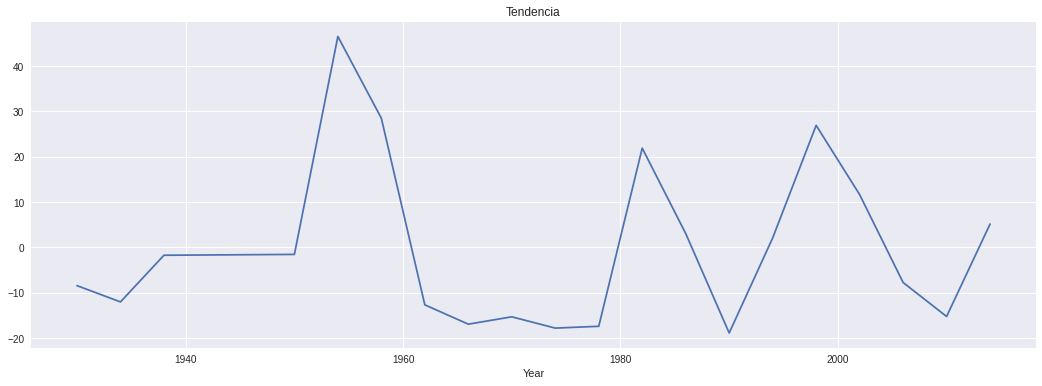

In [ ]:
## Serie estacionada
goles_por_mundial_detrend = sm.tsa.detrend(goles_por_mundial, order=2, axis=1)
plt.title("Tendencia")
goles_por_mundial_detrend.plot(figsize=(18,6))
plt.plot()

In [ ]:
## Pruebo otra vez test Dickey Fuller para la serie estacionada una vez
test_dickey_fuller(goles_por_mundial_detrend, alpha = 0.05)

El p-value (0.021915968396768903) es menor que el alpha (0.05).
Rechazo H0.


(-3.1679575399069626, 0.021915968396768903)

Ahora si, rechazamos H0, por lo tanto, la serie es estacionaria.

In [ ]:
#Esto no se
goles_por_mundial - detrend

Year
1930.0    -8.434416
1934.0   -12.027307
1938.0    -1.732183
1950.0    -1.549043
1954.0    46.522112
1958.0    28.481283
1962.0   -12.671531
1966.0   -16.936329
1970.0   -15.313112
1974.0   -17.801880
1978.0   -17.402632
1982.0    21.884632
1986.0     3.059911
1990.0   -18.876794
1994.0     2.074516
1998.0    26.913841
2002.0    11.641183
2006.0    -7.743461
2010.0   -15.240089
2014.0     5.151299
Name: total_goals, dtype: float64

## ▶ Punto 3
Graficar la FAS, FAC y FACP de la Serie en un solo gráfico por serie y analizarlas

[]

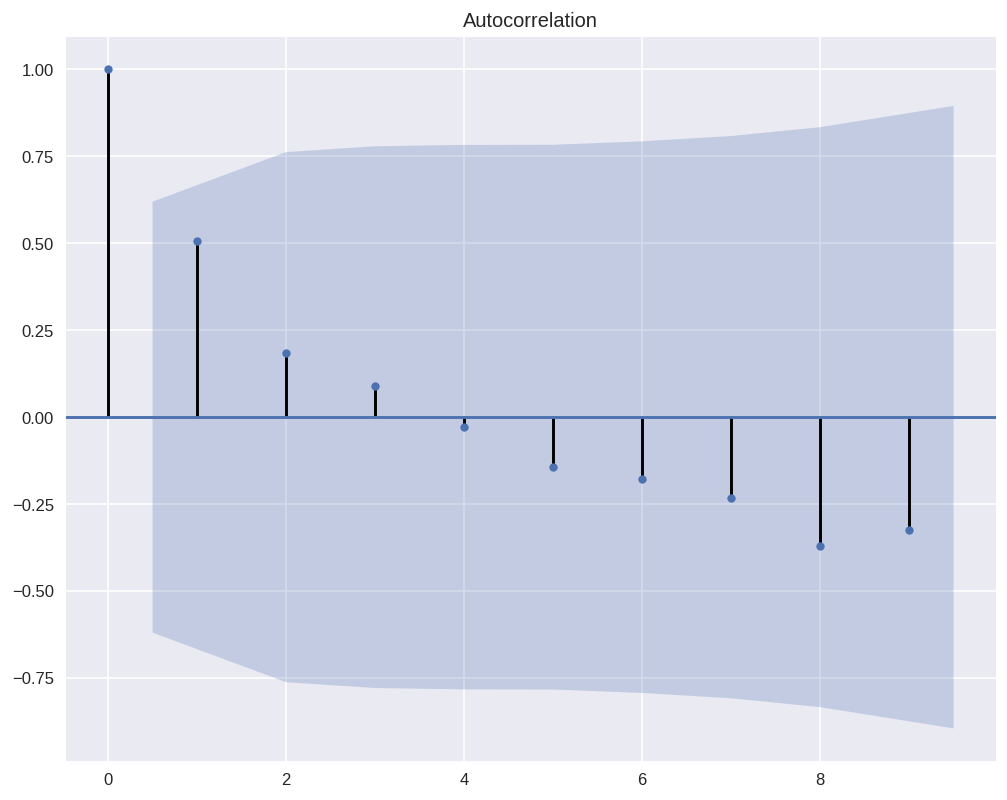

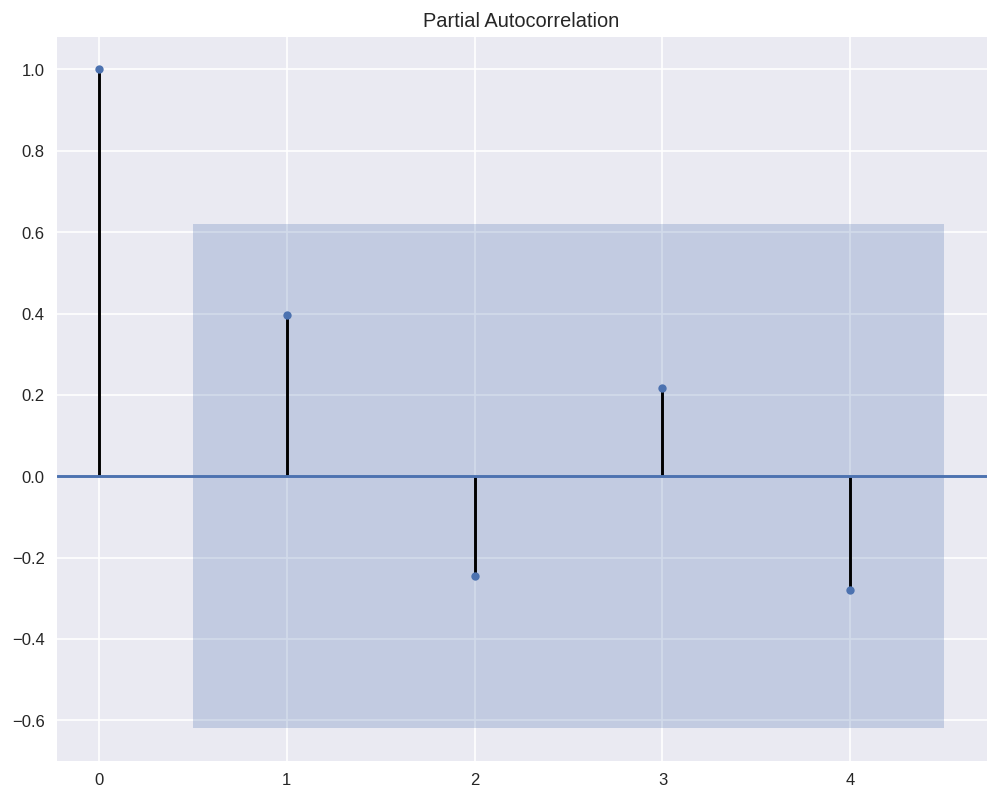

In [ ]:
## FAS
FAC = sm.tsa.acf(goles_por_mundial, nlags = 9)
## FACP
FACP = sm.tsa.pacf(goles_por_mundial, nlags = 9)
plt.rcParams.update({'figure.figsize': (10,8)})
sm.graphics.tsa.plot_acf(FAC.tolist(), lags=9)
sm.graphics.tsa.plot_pacf(FACP.tolist(), lags=4)
plt.plot()

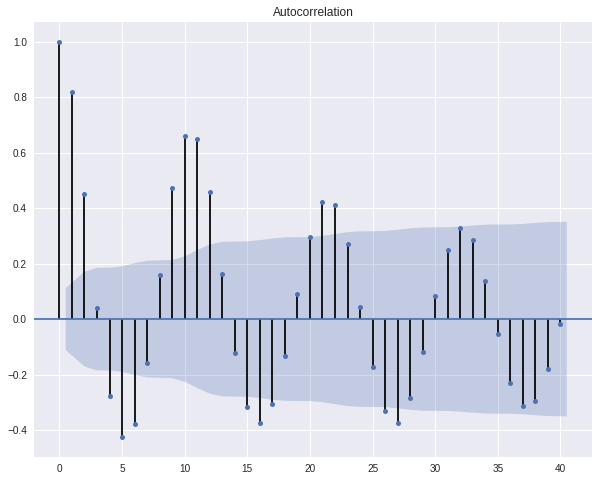

In [ ]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()

## ▶ Punto 4
Efectuar una estimación de ambas series de tiempo a distintos modelos ARIMA y
encontrar aquella que se ajuste mejor a los datos (pueden emplear Criterios de Información y analizar significatividad individual y global de los parámetros del modelo,
tendencias, raíces unitarias, etc). Es importante que detallen una comparación con
otros modelos.

Al observar el gráfico de la FACP, podemos ver que solo el primero de los lags tiene importancia. Por ende, podemos suponer que el valor de p será igual a 1.

Analizando el gráfico de la FAC, podemos considerar usar el valor 1 para el parámetro q.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# p --> 1, d --> 0 ,q --> 1 ARIMA Model
model1_1 = ARIMA(goles_por_mundial_detrend, order=(1,0,1))
model1_1_fit = model1_1.fit(disp=0)
arma11 = model1_1_fit.aic
print(model1_1_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            total_goals   No. Observations:                   20
Model:                     ARMA(1, 1)   Log Likelihood                 -83.670
Method:                       css-mle   S.D. of innovations             15.650
Date:                Fri, 25 Nov 2022   AIC                            175.340
Time:                        20:00:03   BIC                            179.322
Sample:                             0   HQIC                           176.117
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4729      5.036      0.094      0.925      -9.398      10.344
ar.L1.total_goals    -0.2134      0.441     -0.484      0.629      -1.078       0.651
ma.L1.total_goals     0.

In [ ]:
model2_1 = ARIMA(goles_por_mundial_detrend, order=(2,0,1))
model2_1_fit = model2_1.fit(disp=0)
arma21 = model2_1_fit.aic

In [ ]:
model1_2 = ARIMA(goles_por_mundial_detrend, order=(1,0,2))
model1_2_fit = model1_2.fit(disp=0)
arma12 = model1_2_fit.aic

In [ ]:
model2_2 = ARIMA(goles_por_mundial_detrend, order=(2,0,2))
model2_2_fit = model2_2.fit(disp=0)
arma22 = model2_2_fit.aic

In [ ]:
arma_models = [arma11,arma21,arma12,arma22]
arma_modelsbis=set(arma_models)
arma_modelsbis
arma_aic = list(arma_modelsbis)
arma_aic_selected = arma_aic[1]

for i in arma_models:
  if i == arma_aic_selected:
    print(arma_aic_selected['Model'])


print('El modelo seleccionado por criterio de información AIC es', arma_aic_selected,  )

###Falta indicar el orden del modelo. el criterio AIC menor ya lo tenemos.

TypeError: ignored

5) Evaluar el desempeño del modelo a través de la metodología del ’train - test split’.
Puede usar las métricas que considere oportunas.

In [163]:
y = goles_por_mundial_df['Goals']
test_size = 20

x_train = y[:test_size]
x_test = y[test_size:]

In [164]:
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_test.shape}")


Training data shape: (20,)
Validation data shape: (0,)


## **2.3 Simulación**


In [180]:
df_simulacion = (df['Year'] >= 1960) & (df['Year'] <= 2014) & (df['Home Team Name'] == 'Argentina') | (df['Home Team Name'] == 'England') | (df['Home Team Name'] == 'Brazil') | (df['Home Team Name'] == 'Germany')| (df['Home Team Name'] == 'Italy') | (df['Home Team Name'] == 'France') | (df['Home Team Name'] == 'Uruguay') | (df['Home Team Name'] == 'Belgium') | (df['Away Team Name'] == 'Argentina') | (df['Away Team Name'] == 'England') | (df['Away Team Name'] == 'Brazil') | (df['Away Team Name'] == 'Germany')| (df['Away Team Name'] == 'Italy') | (df['Away Team Name'] == 'France') | (df['Away Team Name'] == 'Uruguay') | (df['Away Team Name'] == 'Belgium')


0     True
1     True
2     True
3    False
4     True
dtype: bool

1) Obtener la función de distribución de los goles anotados por cada uno de los equipos;
hay que tener en cuenta que los equipos han disputado partidos tanto de locales como
de visitantes por lo que hay que contemplar ambas columnas a la hora de computar
la distribución. Hint: se recomienda utilizar una distribución tabular; aunque no es la
única solución posible.

In [196]:
arg_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) & (df['Home Team Name'] == 'Argentina') | (df['Away Team Name'] == 'Argentina')
arg_df = df[arg_matches]
eng_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) &(df['Home Team Name'] == 'England') | (df['Away Team Name'] == 'England') 
eng_df = df[eng_matches]
bra_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) &(df['Home Team Name'] == 'Brazil') | (df['Away Team Name'] == 'Brazil')
bra_df = df[bra_matches] 
ger_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) &(df['Home Team Name'] == 'Germany') | (df['Away Team Name'] == 'Germany') 
ger_df = df[ger_matches] 
ita_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) &(df['Home Team Name'] == 'Italy') | (df['Away Team Name'] == 'Italy')
ita_df = df[ita_matches]  
fra_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) &(df['Home Team Name'] == 'France') | (df['Away Team Name'] == 'France') 
fra_df = df[fra_matches] 
uru_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) &(df['Home Team Name'] == 'Uruguay') | (df['Away Team Name'] == 'Uruguay') 
uru_df = df[uru_matches] 
bel_matches = (df['Year'] >= 1960) & (df['Year'] <= 2014) &(df['Home Team Name'] == 'Belgium') | (df['Away Team Name'] == 'Belgium') 
bel_df = df[bel_matches] 

In [195]:
 arg_dist= arg_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(arg_df)
 arg_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 arg_dist

Home Team Goals
0.0    0.183099
1.0    0.309859
2.0    0.253521
3.0    0.112676
4.0    0.084507
5.0    0.014085
6.0    0.042254
dtype: float64

In [197]:
 eng_dist= eng_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(eng_df)
 eng_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 eng_dist

Home Team Goals
0.0    0.258621
1.0    0.327586
2.0    0.241379
3.0    0.120690
4.0    0.051724
dtype: float64

In [198]:
 bra_dist= bra_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(bra_df)
 bra_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 bra_dist


Home Team Goals
0.0    0.209302
1.0    0.244186
2.0    0.232558
3.0    0.197674
4.0    0.116279
dtype: float64

In [199]:
 ger_dist= ger_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(ger_df)
 ger_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 ger_dist


Home Team Goals
0.0    0.268293
1.0    0.268293
2.0    0.219512
3.0    0.097561
4.0    0.121951
8.0    0.024390
dtype: float64

In [200]:
 ita_dist= ita_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(ita_df)
 ita_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 ita_dist

Home Team Goals
0.0    0.194444
1.0    0.375000
2.0    0.250000
3.0    0.125000
4.0    0.055556
dtype: float64

In [201]:
 fra_dist= fra_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(fra_df)
 fra_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 fra_dist

Home Team Goals
0.0    0.326923
1.0    0.230769
2.0    0.173077
3.0    0.173077
4.0    0.076923
5.0    0.019231
dtype: float64

In [202]:
 uru_dist= uru_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(uru_df)
 uru_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 uru_dist

Home Team Goals
0.0    0.300
1.0    0.225
2.0    0.250
3.0    0.150
4.0    0.050
6.0    0.025
dtype: float64

In [203]:
 bel_dist= bel_df.groupby(by = "Home Team Goals")["Home Team Goals"].count()/len(bel_df)
 bel_dist.rename(axis = {"Home Team Goals" : "Frecuencia"}, inplace = True)
 bel_dist

Home Team Goals
0.0    0.121951
1.0    0.365854
2.0    0.195122
3.0    0.195122
4.0    0.097561
5.0    0.024390
dtype: float64